<a href="https://colab.research.google.com/github/roshank1605A04/Loan-Prediction/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries** 


In [1]:
import numpy as np
import pandas as pd
import random
import gdown
from itertools import permutations

import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
# Define the URLs for the train and test data
train_url = 'https://drive.google.com/uc?id=1B3-3DUBYGN725DJ8SYRh0eEyQEkt-OpO'
test_url = 'https://drive.google.com/uc?id=1_7PnQImOu2szQoT2zVL3BPTEaGKMY0Kk'

# Download the files
gdown.download(train_url, 'train.csv', quiet=False)
gdown.download(test_url, 'test.csv', quiet=False)

# Read the CSV files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape)
print(test.shape)

Downloading...
From: https://drive.google.com/uc?id=1B3-3DUBYGN725DJ8SYRh0eEyQEkt-OpO
To: c:\Users\anjan\Downloads\Loan_prediction\train.csv
100%|██████████| 38.0k/38.0k [00:00<00:00, 710kB/s]
Downloading...
From: https://drive.google.com/uc?id=1_7PnQImOu2szQoT2zVL3BPTEaGKMY0Kk
To: c:\Users\anjan\Downloads\Loan_prediction\test.csv
100%|██████████| 22.0k/22.0k [00:00<00:00, 387kB/s]

(614, 13)
(367, 12)


In [3]:
# making copies of train and test
# use only if required

train = train.copy()
test = test.copy()

In [4]:
# visualizing the training dataset

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# viewing the different columns in training and test sets

print(train.columns)
print(test.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [7]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Data Analytics**

In [11]:
# combining the train and test set

# making a 'Loan_Status' column in test set with NaN values
test['Loan_Status'] = 0

# combining train and test datasets
combi = pd.concat([train, test])

# checking the shape of the combined dataset
print(combi.shape)

(981, 13)


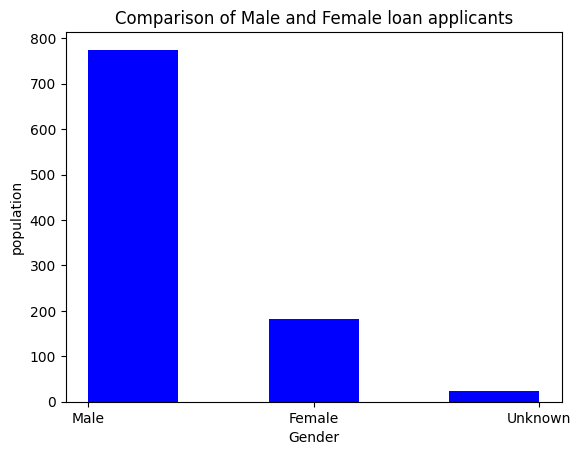

In [13]:
# Univariate Data Analysis
# comparing the gender who applied for the loan

combi['Gender'] = combi['Gender'].fillna('Unknown')

plt.hist(combi['Gender'], bins = 5, color = 'blue')
plt.title('Comparison of Male and Female loan applicants')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

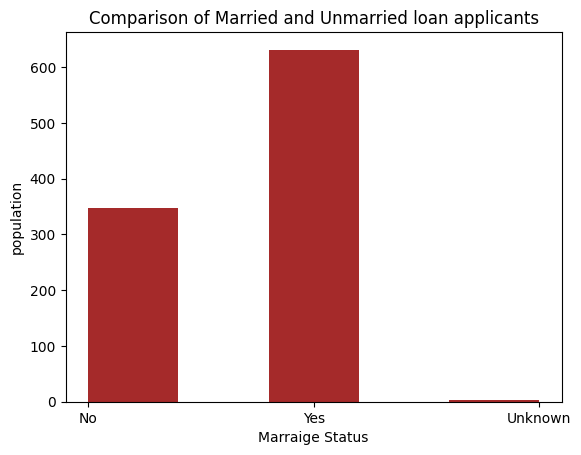

In [15]:
# comparing the Marriage status who applied for the loan

combi['Married'] = combi['Married'].fillna('Unknown')

plt.hist(combi['Married'], bins = 5, color = 'brown')
plt.title('Comparison of Married and Unmarried loan applicants')
plt.xlabel('Marraige Status')
plt.ylabel('population')
plt.show()

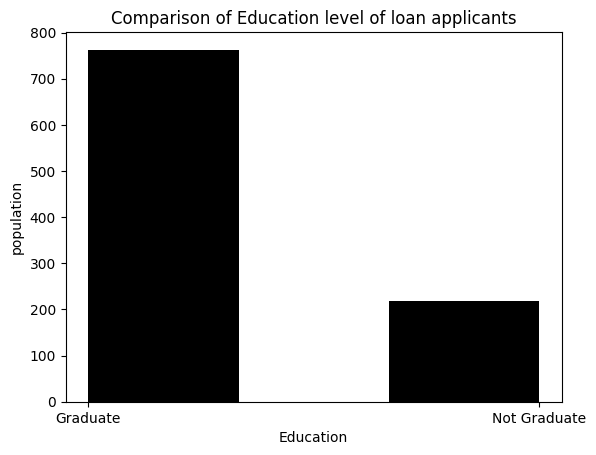

In [16]:
# comparing the Education of applicants who applied for the loan


plt.hist(combi['Education'], bins = 3, color = 'black')
plt.title('Comparison of Education level of loan applicants')
plt.xlabel('Education')
plt.ylabel('population')
plt.show()

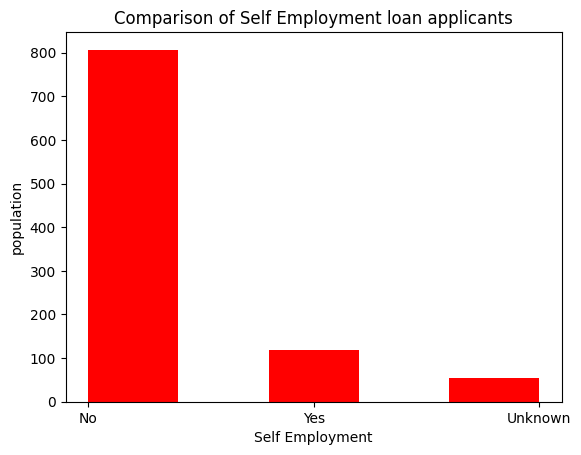

In [18]:
# comparing the Employment status who applied for the loan

combi['Self_Employed'] = combi['Self_Employed'].fillna('Unknown')

plt.hist(combi['Self_Employed'], bins = 5, color = 'red')
plt.title('Comparison of Self Employment loan applicants')
plt.xlabel('Self Employment')
plt.ylabel('population')
plt.show()

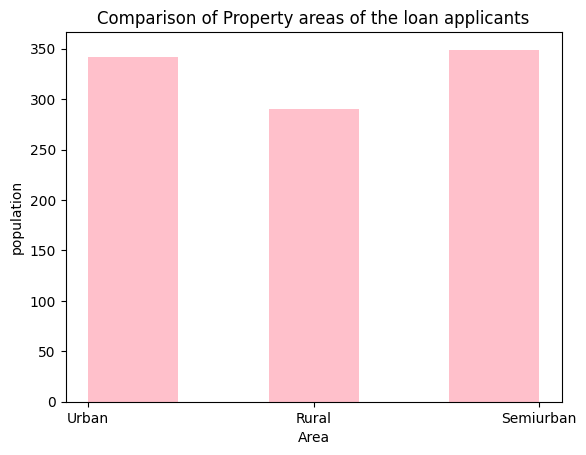

In [19]:
# comparing the Area who applied for the loan

plt.hist(combi['Property_Area'], bins = 5, color = 'pink')
plt.title('Comparison of Property areas of the loan applicants')
plt.xlabel('Area')
plt.ylabel('population')
plt.show()

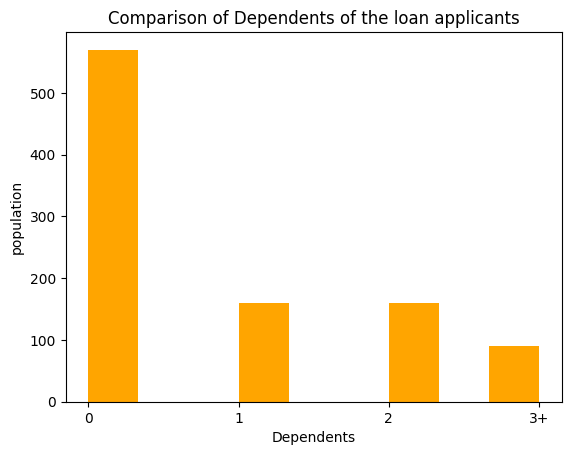

In [21]:
# comparing the Dependants who applied for the loan

combi['Dependents'] = combi['Dependents'].fillna('0')

dependents_count = combi['Dependents'].value_counts()

plt.hist(combi['Dependents'], bins = 9, color = 'orange')
plt.title('Comparison of Dependents of the loan applicants')
plt.xlabel('Dependents')
plt.ylabel('population')
plt.show()

<Axes: xlabel='Gender'>

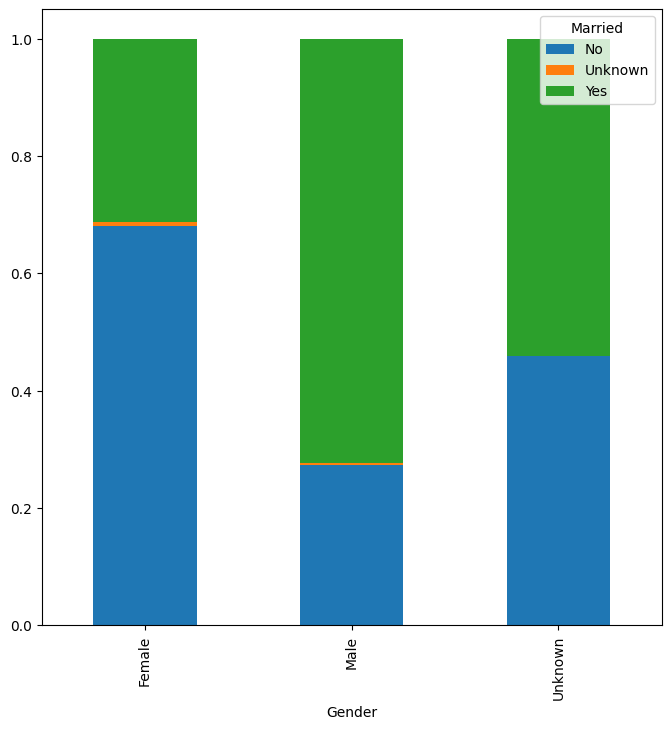

In [22]:
# Bivariate Data Analysis
# comparison of gender vs marriage status


Gender = pd.crosstab(combi['Gender'], combi['Married'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Gender'>

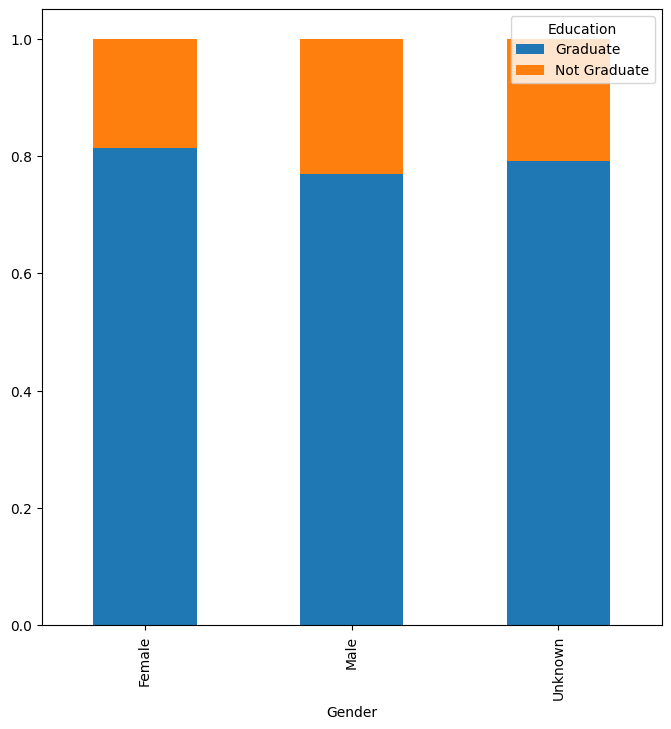

In [23]:
# comparison of gender vs education level


Gender = pd.crosstab(combi['Gender'], combi['Education'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Gender'>

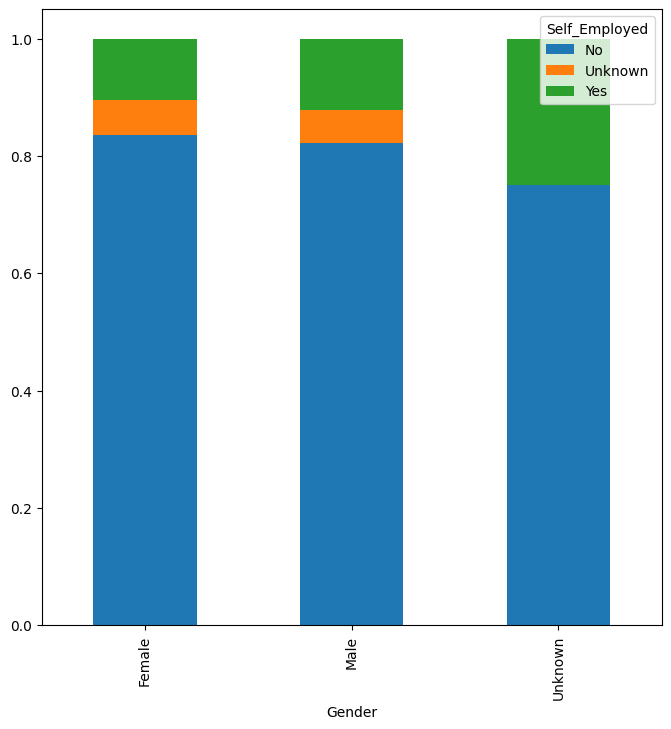

In [24]:
# comparison of gender vs self Employment


Gender = pd.crosstab(combi['Gender'], combi['Self_Employed'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Gender'>

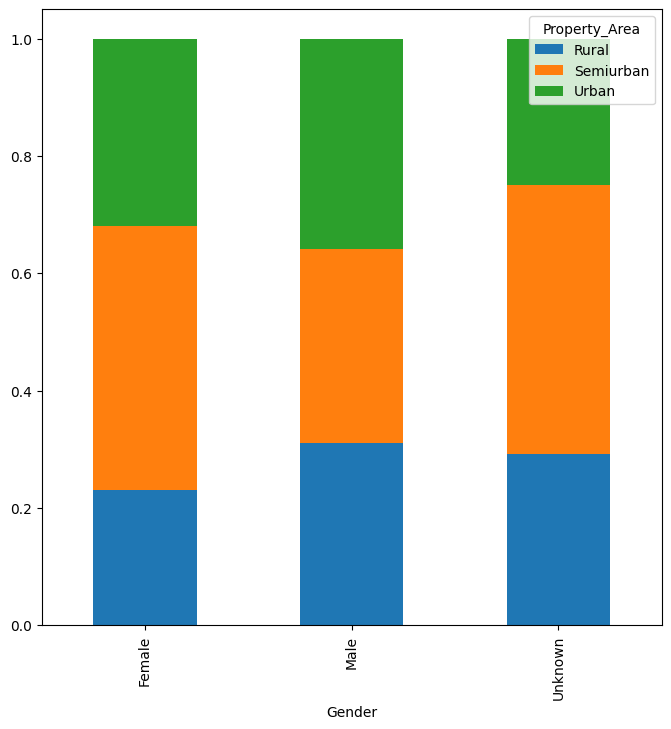

In [25]:
# comparison of gender vs property area


Gender = pd.crosstab(combi['Gender'], combi['Property_Area'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Education'>

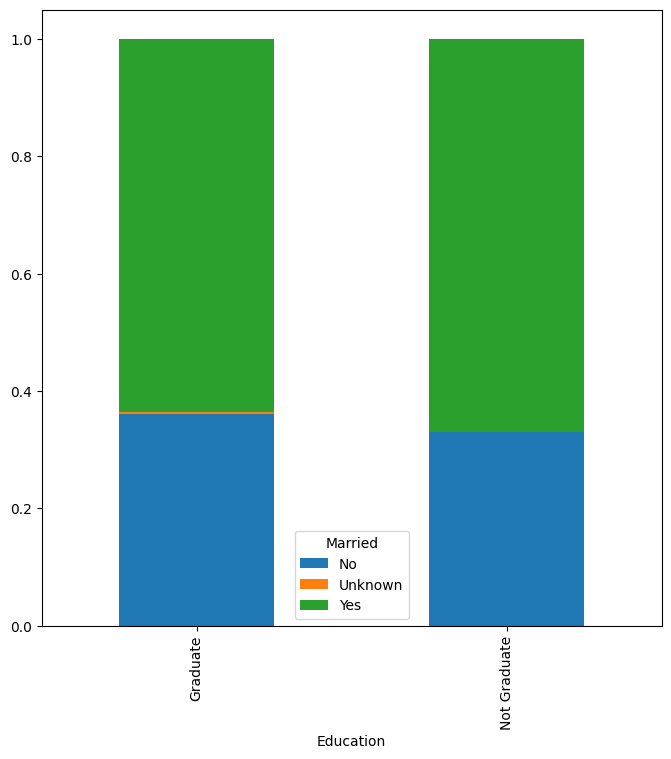

In [26]:
# comparison of Education vs marriage status


Education = pd.crosstab(combi['Education'], combi['Married'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Education'>

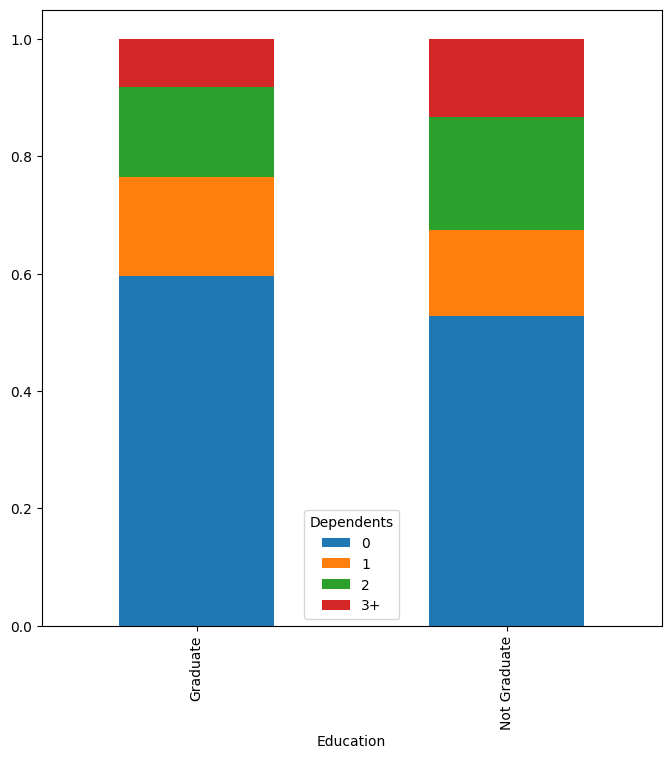

In [27]:
# comparison of Education vs Dependants


Education = pd.crosstab(combi['Education'], combi['Dependents'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Education'>

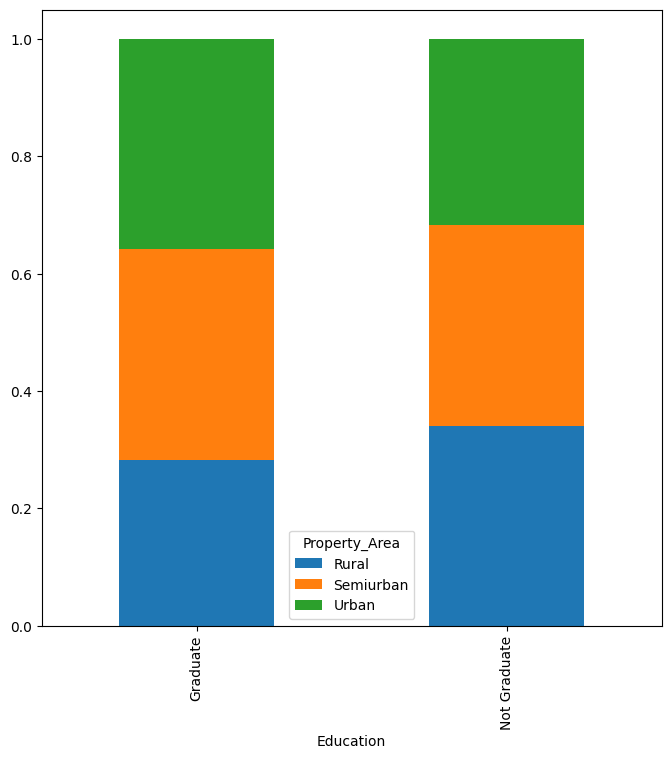

In [28]:
# comparison of Education vs property area


Education = pd.crosstab(combi['Education'], combi['Property_Area'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

<Axes: xlabel='Self_Employed'>

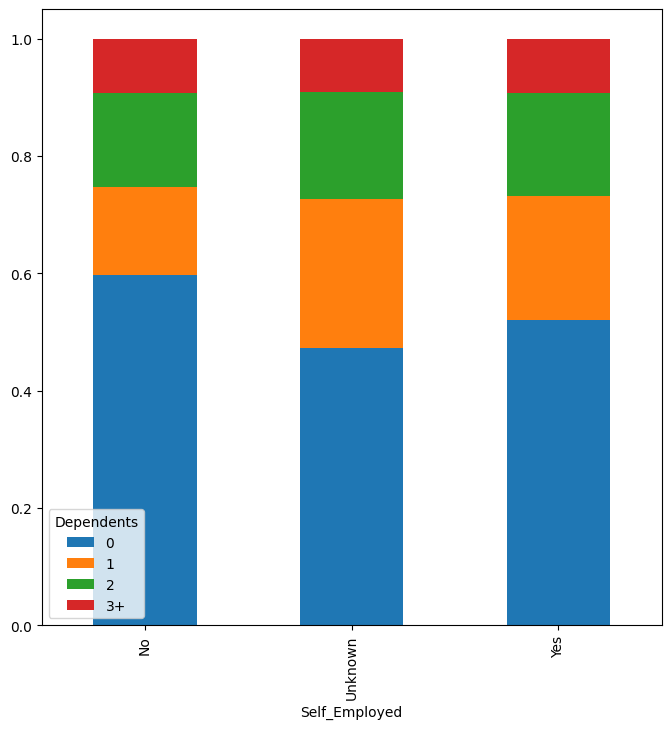

In [29]:
# comparison of Self employment vs dependency


Self_Employed = pd.crosstab(combi['Self_Employed'], combi['Dependents'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (8, 8))

**Data Preprocessing**

In [30]:
# Imputing the missing values in train dataset

# Fill missing values with the mode for each column and reassign to the original DataFrame
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mode()[0])


# train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
# train['Married'].fillna(train['Married'].mode()[0], inplace = True)
# train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
# train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
# train['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
# train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
# train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

train.isnull().any()


Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [31]:
# Imputing the missing values in test dataset

test['Gender'] = test['Gender'].fillna(train['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(train['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(train['Dependents'].mode()[0])
test['Credit_History'] = test['Credit_History'].fillna(train['Credit_History'].mode()[0])

# test['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
# test['Married'].fillna(train['Married'].mode()[0], inplace = True)
# test['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
# test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
# test['LoanAmount'].fillna(train['LoanAmount'].mode()[0], inplace = True)
# test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
# test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)


train.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [32]:
# Removing unnecassary columns

train = train.drop(columns = 'Loan_ID')
test = test.drop(columns = 'Loan_ID')

print(train.shape)
print(test.shape)


(614, 12)
(367, 12)


In [0]:
# optional
# splitting combi again into train and test

#train = combi.iloc[:614,:]
#test = combi.iloc[614:,:]
#test = test.drop(columns = 'Loan_Status')

#print(train.shape)
#print(test.shape)

In [33]:
# splitting the training set into x(independent) and y(independent) variables

#x_train = train.iloc[:,:-1]
#y_train = train.iloc[:,11]
#x_test = test.iloc[:,:]

x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

print(x.shape)
print(y.shape)
#print(y_train)

(614, 11)
(614,)


In [34]:
# converting categorical variables into numerical values
# One Hot Encoding

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

print(x.shape)

(614, 20)


In [36]:
# splitting x and y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(429, 20)
(429,)
(185, 20)
(185,)


**Modelling**

**Logistic Regression**

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

target_column = 'Loan_Status_Y' 

# Prepare features and target
x = train.drop([target_column, 'Loan_Status_N'], axis=1)  # Dropping both target columns
y = train[target_column]  # Use Loan_Status_Y as the target

# If you want to ensure there are no NaN values, you can use SimpleImputer as before
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)  # Handle missing values

# Scale the features
scaler = StandardScaler()
x = scaler.fit_transform(x)  # Scale features

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Fit the model
model = LogisticRegression()
model = LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)



print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8041958041958042
Testing Accuracy : 0.8324324324324325


**Support Vector Machine**

In [45]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 0.8158508158508159
Testing Accuracy : 0.8324324324324325


**Decision Tree**

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7783783783783784


**Random Forset**

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 0.8


**Multi Layer Perceptron**

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Preprocessing function
def preprocess_data(df, target_col):
    x = df.drop([target_col, 'Loan_Status_N'], axis=1)  # Drop target columns
    y = df[target_col]
    
    # Create an imputer instance
    imputer = SimpleImputer(strategy='mean')
    x = imputer.fit_transform(x)  # Replace NaN values with the mean

    # Scale the features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Scale features
    
    return x, y

# Preprocess the data
x, y = preprocess_data(train, target_column)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Example with Logistic Regression
logistic_model = LogisticRegression(max_iter=200)  # Adjust parameters as needed
logistic_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(x_test)
print("Logistic Regression Training Accuracy :", logistic_model.score(x_train, y_train))
print("Logistic Regression Testing Accuracy :", logistic_model.score(x_test, y_test))

# Example with MLP with increased max_iter and adjusted learning rate
mlp_model = MLPClassifier(max_iter=1000, learning_rate_init=0.0001)  # Adjust as needed
mlp_model.fit(x_train, y_train)  # Use x_train and y_train

# Predict and evaluate
y_pred_mlp = mlp_model.predict(x_test)
print("MLP Training Accuracy :", mlp_model.score(x_train, y_train))
print("MLP Testing Accuracy :", mlp_model.score(x_test, y_test))


Logistic Regression Training Accuracy : 0.8041958041958042
Logistic Regression Testing Accuracy : 0.8324324324324325
MLP Training Accuracy : 0.8228438228438228
MLP Testing Accuracy : 0.8324324324324325


In [54]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create a function to preprocess user input
def preprocess_user_input(input_data):
    # Convert input data to a DataFrame or suitable format
    input_df = pd.DataFrame([input_data])
    
    # Use the imputer to fill in missing values
    input_df = imputer.transform(input_df)
    
    # Scale the features
    input_df = scaler.transform(input_df)
    
    return input_df

# Function to predict loan approval
def predict_loan_approval(input_data):
    processed_input = preprocess_user_input(input_data)
    prediction = mlp_model.predict(processed_input)
    
    return "Approved" if prediction[0] == 1 else "Not Approved"

# Example input (replace with actual input gathering)
input_data = {
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 0,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Gender_Female': 0,
    'Gender_Male': 1,
    'Married_No': 0,
    'Married_Yes': 1,
    'Dependents_0': 1,
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 0,
    'Education_Graduate': 1,
    'Education_Not Graduate': 0,
    'Self_Employed_No': 1,
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 0,
    'Property_Area_Semiurban': 1,
    'Property_Area_Urban': 0
}

# Get the prediction
result = predict_loan_approval(input_data)
print(f"Loan Application Status: {result}")


Loan Application Status: Approved


In [55]:
input_data_not_approved = {
    'ApplicantIncome': 2000,        # Low income
    'CoapplicantIncome': 0,         # No coapplicant income
    'LoanAmount': 200,              # Requested loan amount is relatively high
    'Loan_Amount_Term': 360,        # Standard loan term
    'Credit_History': 0,            # Poor credit history
    'Gender_Female': 0,             # Gender feature (if applicable)
    'Gender_Male': 1,
    'Married_No': 1,                # Not married
    'Married_Yes': 0,
    'Dependents_0': 0,
    'Dependents_1': 1,              # One dependent
    'Dependents_2': 0,
    'Dependents_3+': 0,
    'Education_Graduate': 0,        # Not a graduate
    'Education_Not Graduate': 1,
    'Self_Employed_No': 1,          # Not self-employed
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 1,       # Property in a rural area
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 0
}

# Get the prediction
result_not_approved = predict_loan_approval(input_data_not_approved)
print(f"Loan Application Status: {result_not_approved}")

Loan Application Status: Not Approved


In [56]:
input_data_approved = {
    'ApplicantIncome': 6000,        # Good income
    'CoapplicantIncome': 2000,      # Additional income from a coapplicant
    'LoanAmount': 150,              # Reasonable loan amount
    'Loan_Amount_Term': 360,        # Standard loan term
    'Credit_History': 1,            # Good credit history
    'Gender_Female': 0,             # Gender feature (if applicable)
    'Gender_Male': 1,
    'Married_No': 0,                # Married status (stable relationship)
    'Married_Yes': 1,
    'Dependents_0': 1,              # One dependent
    'Dependents_1': 0,
    'Dependents_2': 0,
    'Dependents_3+': 0,
    'Education_Graduate': 1,        # Graduate degree
    'Education_Not Graduate': 0,
    'Self_Employed_No': 1,          # Employed (not self-employed)
    'Self_Employed_Yes': 0,
    'Property_Area_Rural': 0,       # Property in an urban area
    'Property_Area_Semiurban': 0,
    'Property_Area_Urban': 1        # Property in an urban area
}

# Get the prediction
result_approved = predict_loan_approval(input_data_approved)
print(f"Loan Application Status: {result_approved}")

Loan Application Status: Approved
